<a href="https://colab.research.google.com/github/ziyasarican/PythonMachineLearning/blob/main/DeepLearning/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

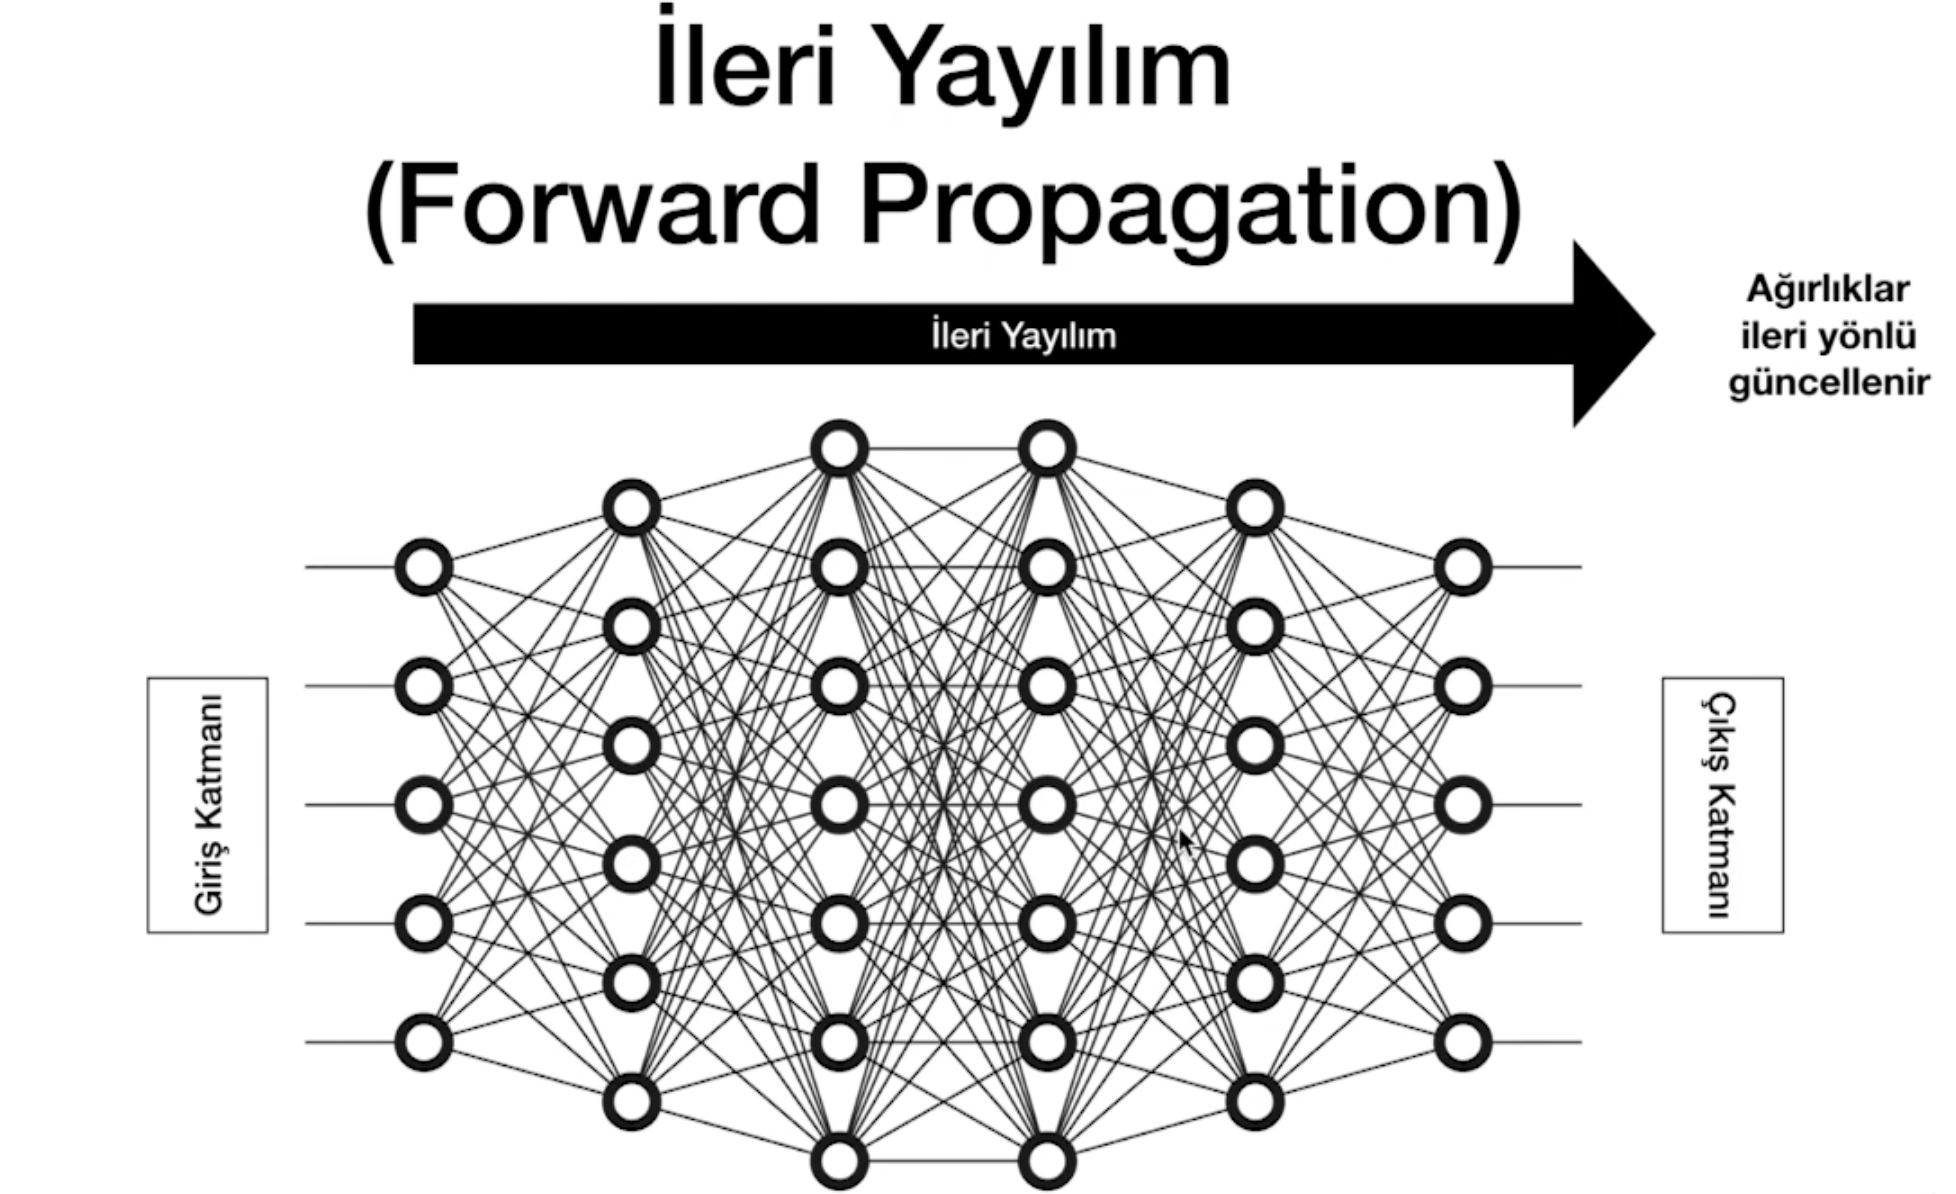

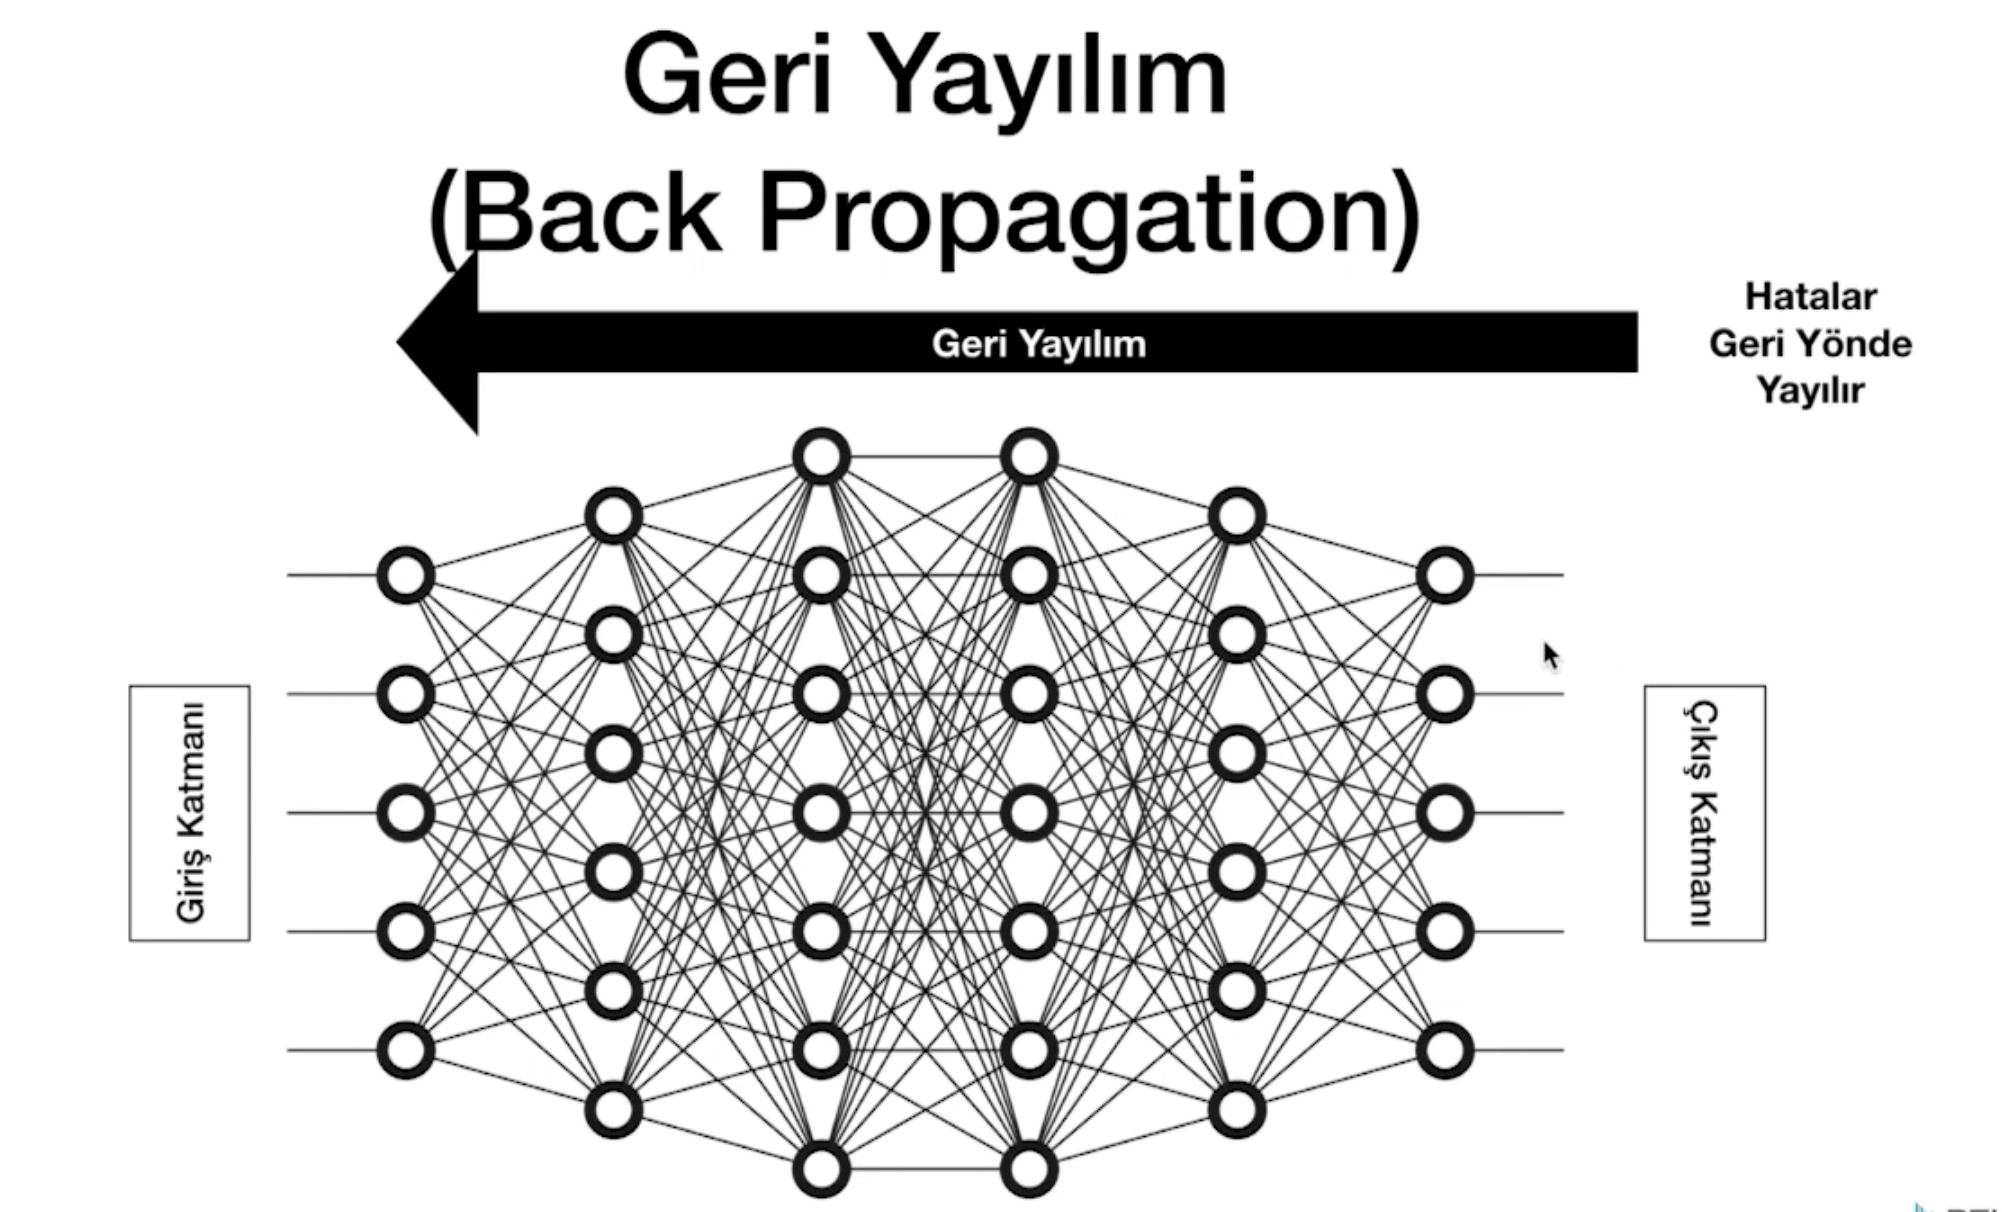



1. Bütün ağa rastgele sıfıra yakın sayılar ver.
2. Veri kümesinden ilk satır öznetiliğe göre verilir. (örneğin boy-kilo değerinden cinsiyet tahmin edeceğiz. İlk katmanda 2 nöron olur.)
3. İleri Yayılım yapılır. Epoch kavramı devreye girer.(İstenen çıktı çıkmadıysa güncelle) 
4. Gerçek ve çıktı arasındaki fark (hata) hesaplanır.
5. Geri Yayılım yapılır. Bu aşamada her sinapsis üzerindeki ağırlık hatadan sorumlu olduğu miktarda değiştirilir.
6. 1-5 adımları istenen sonuç elde edilene kadar tekrarlanır. (Reinforced Learning, Batch Learning)
7. Bütün eğitim kümesi çalıştırıldıktan sonra bir tur(epoch) tamamlanır. Aynı veri kümesi üzerinde tekrar çalıştırılır. 



In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# İlk 3 sütunu kaldırmalıyız çünkü o sütunlardaki verilerle öğrenmek bir anlam ifade etmez, sonuçla bir bağlantısı yok
# Amaç exited durumunu bulmak

y = df.iloc[:,-1].values #exited
x = df.iloc[:,3:13].values #others
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [4]:
# Geography-gender sütunlarını encoder yapmak gerekli
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])

In [5]:
le2 = preprocessing.LabelEncoder()
x[:,2] = le2.fit_transform(x[:,2])

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float),[1])], remainder="passthrough")
x = ohe.fit_transform(x)
x = x [:,1:]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [29]:
import keras

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# 11 sütun kullanacağız, 1 tane de çıkış. Ortalamasında bir sayıda nöron sayısı almak makul olabilir.
model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu"))
model.add(Dense(6,activation = "relu")) 

model.add(Dense(1))

model.compile(optimizer = "adam", loss="mse", metrics=["accuracy"])

In [37]:
model.fit (x_train, y_train, validation_data=(x_test,y_test), batch_size=300, epochs=200)

Epoch 1/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.8651 - val_loss: 0.1038 - val_accuracy: 0.8593
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.8651 - val_loss: 0.1037 - val_accuracy: 0.8597
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.8649 - val_loss: 0.1037 - val_accuracy: 0.8597
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.8651 - val_loss: 0.1036 - val_accuracy: 0.8600
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.8656 - val_loss: 0.1049 - val_accuracy: 0.8623
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.8636 - val_loss: 0.1038 - val_accuracy: 0.8617
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.8659 - val_loss: 0.1039 - val_accuracy: 0.8613
Epoch 8/200
2

In [42]:
y_pred = model.predict(x_test)
y_pred

94/94 [==============================] - 0s 1ms/step


array([[0.18730956],
       [0.18185842],
       [0.02330003],
       ...,
       [0.06681941],
       [0.0250428 ],
       [0.74673647]], dtype=float32)

In [43]:
y_pred = (y_pred > 0.5)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[2301,   78],
       [ 339,  282]])